# Comprehensive Machine Learning Analysis of the Iris Dataset

## Table of Contents
1. **Data Loading and Exploration**
2. **Exploratory Data Analysis (EDA)**
3. **K-Means Clustering Analysis**
4. **Regression Analysis**
5. **Classification with Multiple Algorithms**
6. **Model Comparison and Conclusions**

---

## Introduction
The Iris dataset is a classic dataset in machine learning, containing measurements of 150 iris flowers from three species: Setosa, Versicolor, and Virginica. Each sample has four features:
- Sepal Length (cm)
- Sepal Width (cm)
- Petal Length (cm)
- Petal Width (cm)

## 1. Setup and Data Loading

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                           silhouette_score, mean_squared_error, r2_score)

# Clustering
from sklearn.cluster import KMeans

# Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

# Classification
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Set random seed for reproducibility
np.random.seed(42)

# Configure visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [28]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Create a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=feature_names)
df.to_csv('iris.csv', index=False)
df['species'] = y
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset shape: (150, 6)

First 5 rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## 2. Exploratory Data Analysis (EDA)

Let's explore the dataset to understand its characteristics, distributions, and relationships between variables.

In [3]:
# Basic statistics
print("Dataset Information:")
print(df.info())
print("\nStatistical Summary:")
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Statistical Summary:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())
print("\nSpecies distribution:")
print(df['species_name'].value_counts())

Missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64

Species distribution:
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


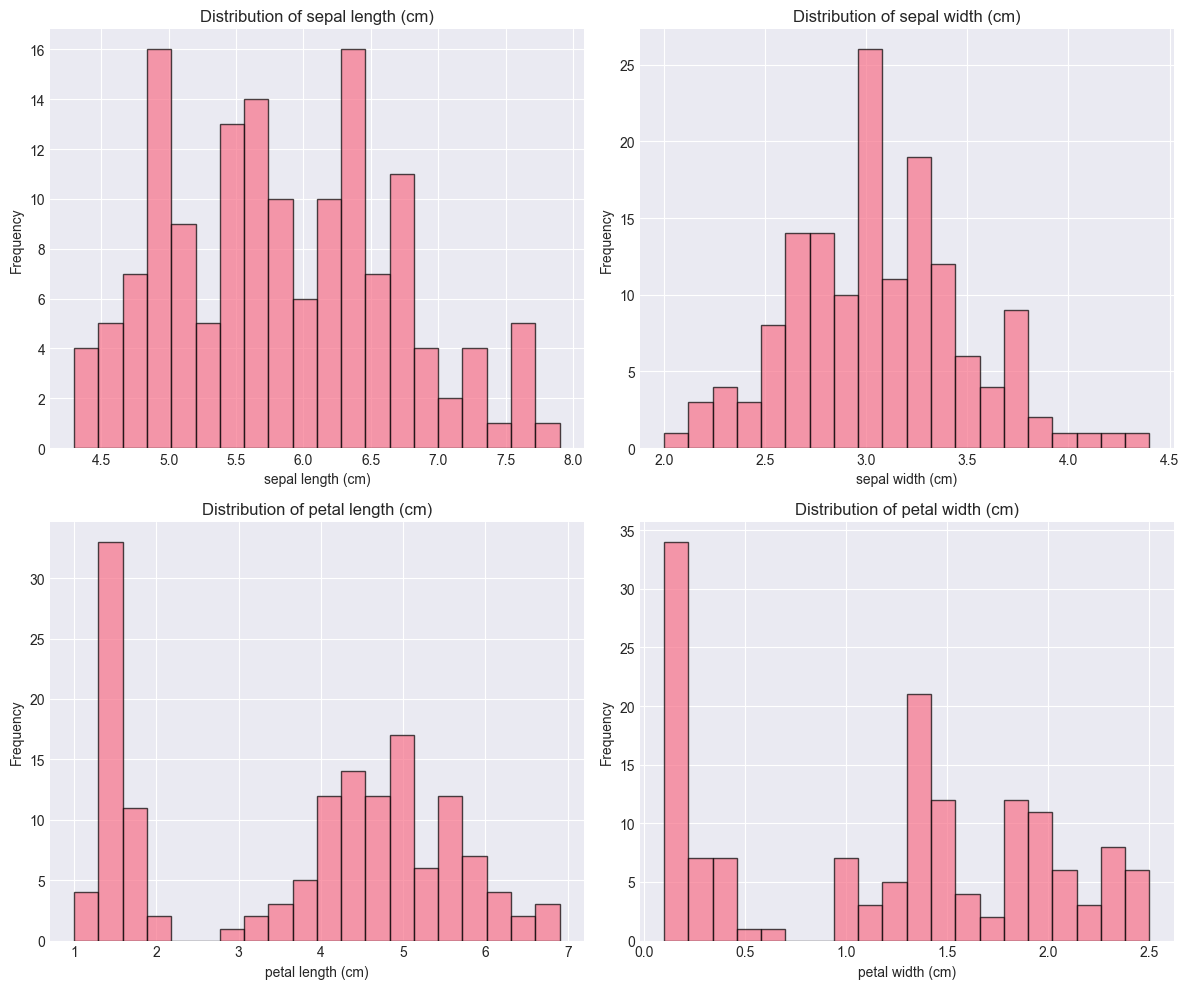

In [5]:
# Distribution plots for each feature
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, col in enumerate(feature_names):
    axes[idx].hist(df[col], bins=20, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

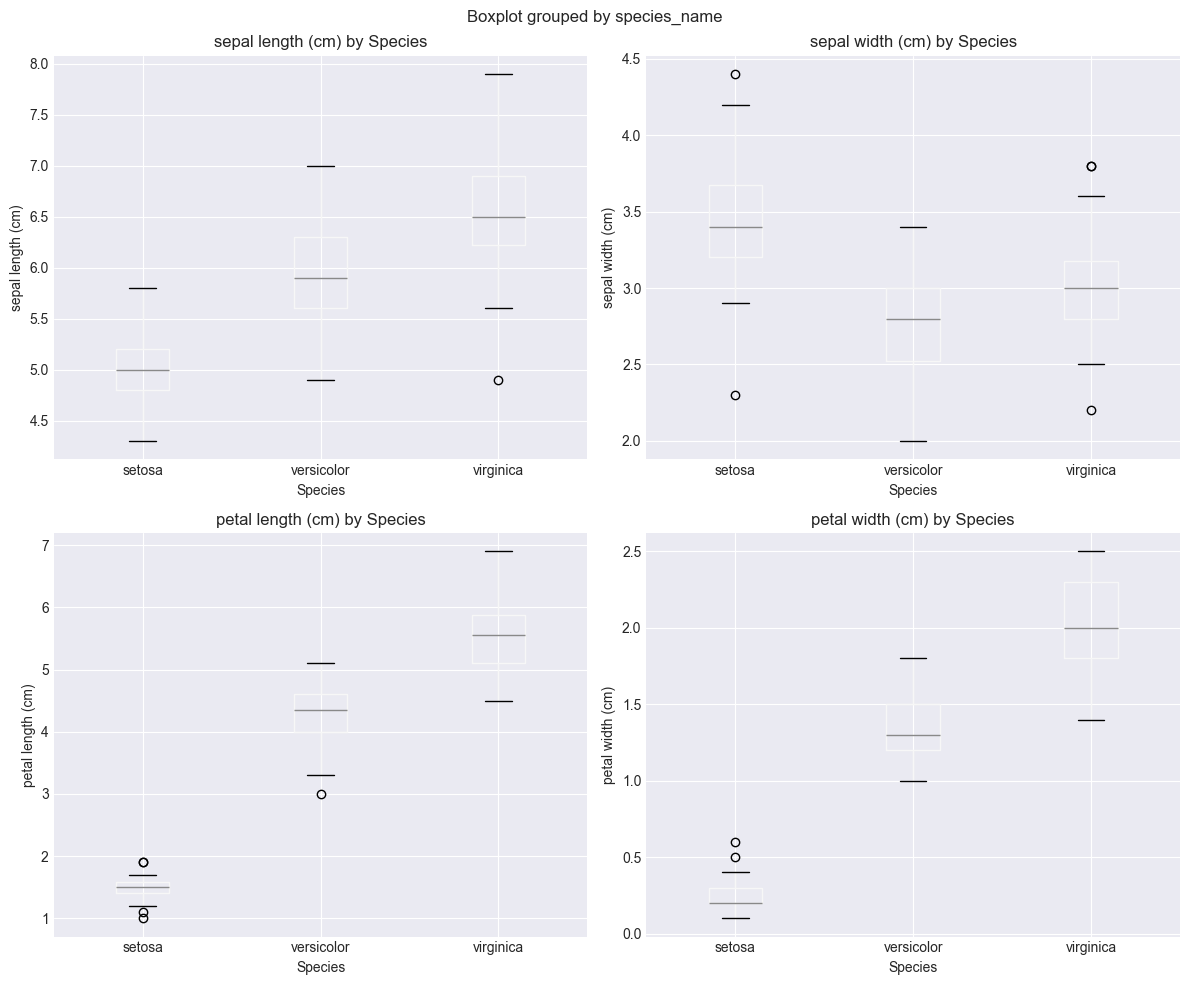

In [6]:
# Box plots by species
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, col in enumerate(feature_names):
    df.boxplot(column=col, by='species_name', ax=axes[idx])
    axes[idx].set_title(f'{col} by Species')
    axes[idx].set_xlabel('Species')
    axes[idx].set_ylabel(col)

plt.tight_layout()
plt.show()

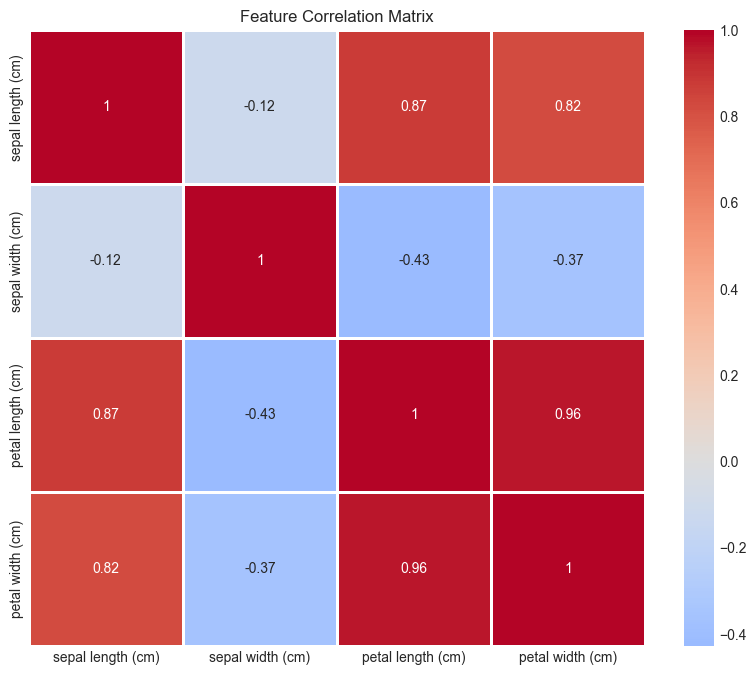

Observations:
- Petal length and petal width are highly correlated (0.96)
- Sepal length also shows strong correlation with petal dimensions
- Sepal width has the weakest correlations with other features


In [7]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[feature_names].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1)
plt.title('Feature Correlation Matrix')
plt.show()

print("Observations:")
print("- Petal length and petal width are highly correlated (0.96)")
print("- Sepal length also shows strong correlation with petal dimensions")
print("- Sepal width has the weakest correlations with other features")

<Figure size 1200x1000 with 0 Axes>

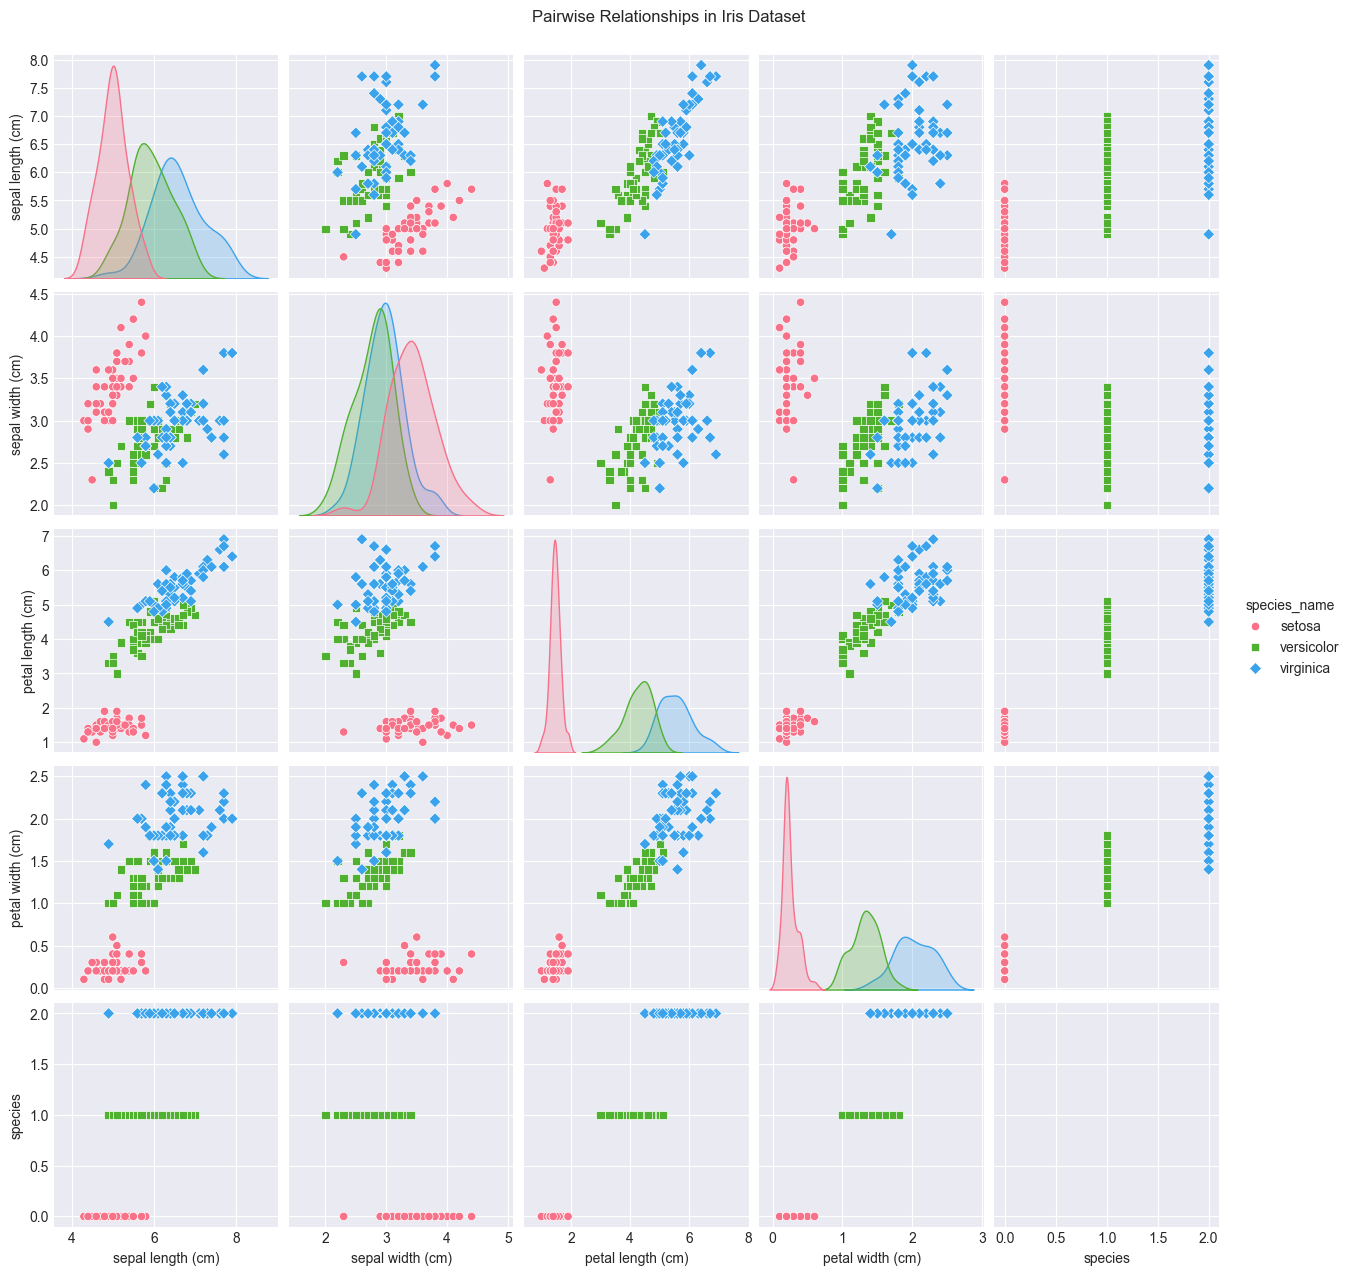

Key Insights from Pair Plot:
- Setosa is clearly separable from other species
- Versicolor and Virginica show some overlap
- Petal measurements provide better species separation than sepal measurements


In [8]:
# Pair plot to visualize relationships
plt.figure(figsize=(12, 10))
pair_plot = sns.pairplot(df, hue='species_name', diag_kind='kde', 
                         markers=['o', 's', 'D'], palette='husl')
pair_plot.fig.suptitle('Pairwise Relationships in Iris Dataset', y=1.02)
plt.show()

print("Key Insights from Pair Plot:")
print("- Setosa is clearly separable from other species")
print("- Versicolor and Virginica show some overlap")
print("- Petal measurements provide better species separation than sepal measurements")

## 3. K-Means Clustering Analysis

K-means clustering is an unsupervised learning algorithm that groups data points into K clusters based on feature similarity. Let's apply it to the 4 numeric features of the Iris dataset.

In [9]:
# Prepare data for clustering (using only numeric features)
X_cluster = df[feature_names].values

# Standardize the features (important for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

print("Shape of clustering data:", X_scaled.shape)
print("Features used:", feature_names)

Shape of clustering data: (150, 4)
Features used: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


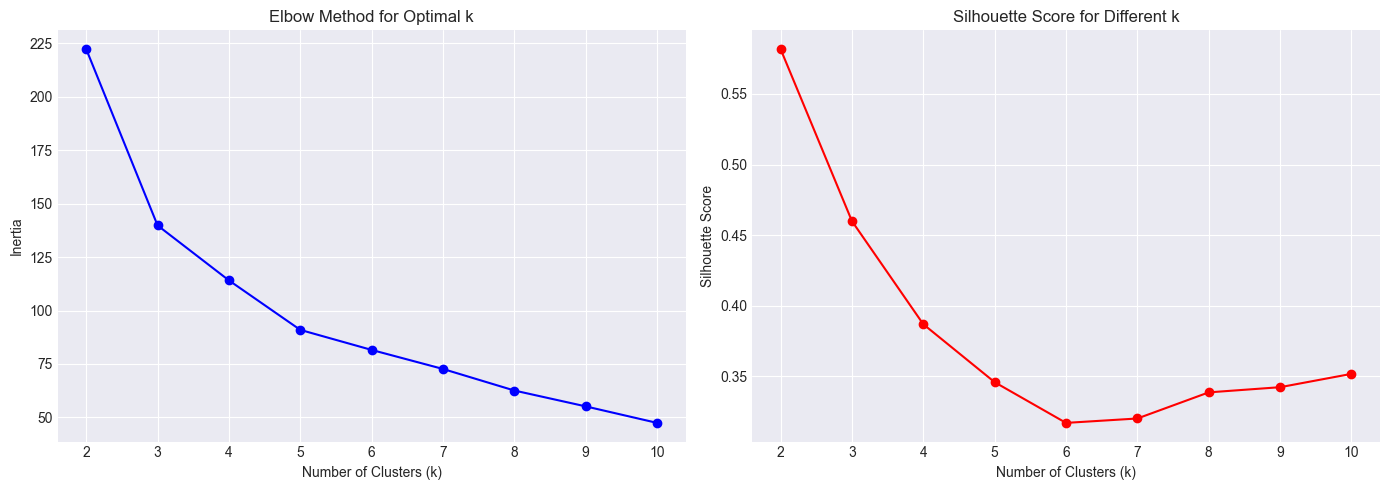

Optimal k appears to be 3 based on the elbow method and silhouette scores


In [10]:
# Elbow method to find optimal number of clusters
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot elbow curve and silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Elbow plot
ax1.plot(K_range, inertias, 'bo-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method for Optimal k')
ax1.grid(True)

# Silhouette score plot
ax2.plot(K_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score for Different k')
ax2.grid(True)

plt.tight_layout()
plt.show()

print("Optimal k appears to be 3 based on the elbow method and silhouette scores")

In [11]:
# Apply K-means with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['cluster'] = cluster_labels

# Compare clusters with actual species
cluster_comparison = pd.crosstab(df['species_name'], df['cluster'])
print("Cluster vs Species Comparison:")
print(cluster_comparison)

Cluster vs Species Comparison:
cluster        0   1   2
species_name            
setosa         0  50   0
versicolor    39   0  11
virginica     14   0  36


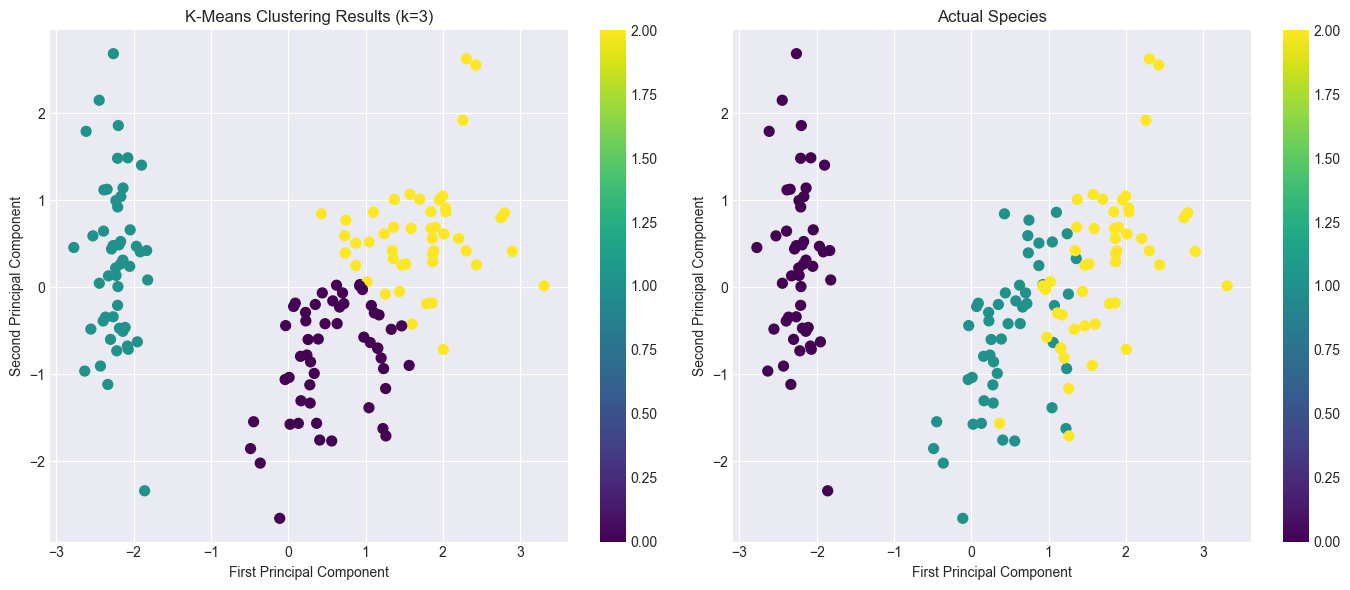

Explained variance by 2 PCA components: 95.81%


In [12]:
# Visualize clustering results
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Clusters
scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
ax1.set_title('K-Means Clustering Results (k=3)')
plt.colorbar(scatter1, ax=ax1)

# Plot 2: Actual species
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50)
ax2.set_xlabel('First Principal Component')
ax2.set_ylabel('Second Principal Component')
ax2.set_title('Actual Species')
plt.colorbar(scatter2, ax=ax2)

plt.tight_layout()
plt.show()

print(f"Explained variance by 2 PCA components: {pca.explained_variance_ratio_.sum():.2%}")

In [13]:
# Cluster characteristics
print("Cluster Characteristics (Mean values):")
print("=" * 60)
cluster_means = df.groupby('cluster')[feature_names].mean()
print(cluster_means.round(2))

print("\nCluster Sizes:")
print(df['cluster'].value_counts().sort_index())

Cluster Characteristics (Mean values):
         sepal length (cm)  sepal width (cm)  petal length (cm)  \
cluster                                                           
0                     5.80              2.67               4.37   
1                     5.01              3.43               1.46   
2                     6.78              3.10               5.51   

         petal width (cm)  
cluster                    
0                    1.41  
1                    0.25  
2                    1.97  

Cluster Sizes:
cluster
0    53
1    50
2    47
Name: count, dtype: int64


## 4. Regression Analysis

Let's predict one numeric variable (petal length) using the other numeric variables (sepal length, sepal width, and petal width).

In [14]:
# Prepare data for regression
# Target: petal length
# Features: sepal length, sepal width, petal width
regression_features = ['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']
X_reg = df[regression_features]
y_reg = df['petal length (cm)']

# Split the data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

print("Regression task: Predicting Petal Length")
print(f"Training samples: {len(X_train_reg)}")
print(f"Testing samples: {len(X_test_reg)}")
print(f"Features: {regression_features}")

Regression task: Predicting Petal Length
Training samples: 105
Testing samples: 45
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']


In [15]:
# Train multiple regression models
regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

regression_results = {}

for name, model in regression_models.items():
    # Train the model
    model.fit(X_train_reg, y_train_reg)
    
    # Make predictions
    y_pred_train = model.predict(X_train_reg)
    y_pred_test = model.predict(X_test_reg)
    
    # Calculate metrics
    train_mse = mean_squared_error(y_train_reg, y_pred_train)
    test_mse = mean_squared_error(y_test_reg, y_pred_test)
    train_r2 = r2_score(y_train_reg, y_pred_train)
    test_r2 = r2_score(y_test_reg, y_pred_test)
    
    regression_results[name] = {
        'model': model,
        'predictions': y_pred_test,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_r2': train_r2,
        'test_r2': test_r2
    }
    
    print(f"\n{name}:")
    print(f"  Train MSE: {train_mse:.4f}, Train R²: {train_r2:.4f}")
    print(f"  Test MSE: {test_mse:.4f}, Test R²: {test_r2:.4f}")


Linear Regression:
  Train MSE: 0.0960, Train R²: 0.9673
  Test MSE: 0.1091, Test R²: 0.9676

Ridge Regression:
  Train MSE: 0.0965, Train R²: 0.9671
  Test MSE: 0.1083, Test R²: 0.9679

Lasso Regression:
  Train MSE: 0.1673, Train R²: 0.9430
  Test MSE: 0.1910, Test R²: 0.9434

Random Forest:
  Train MSE: 0.0100, Train R²: 0.9966
  Test MSE: 0.0900, Test R²: 0.9733


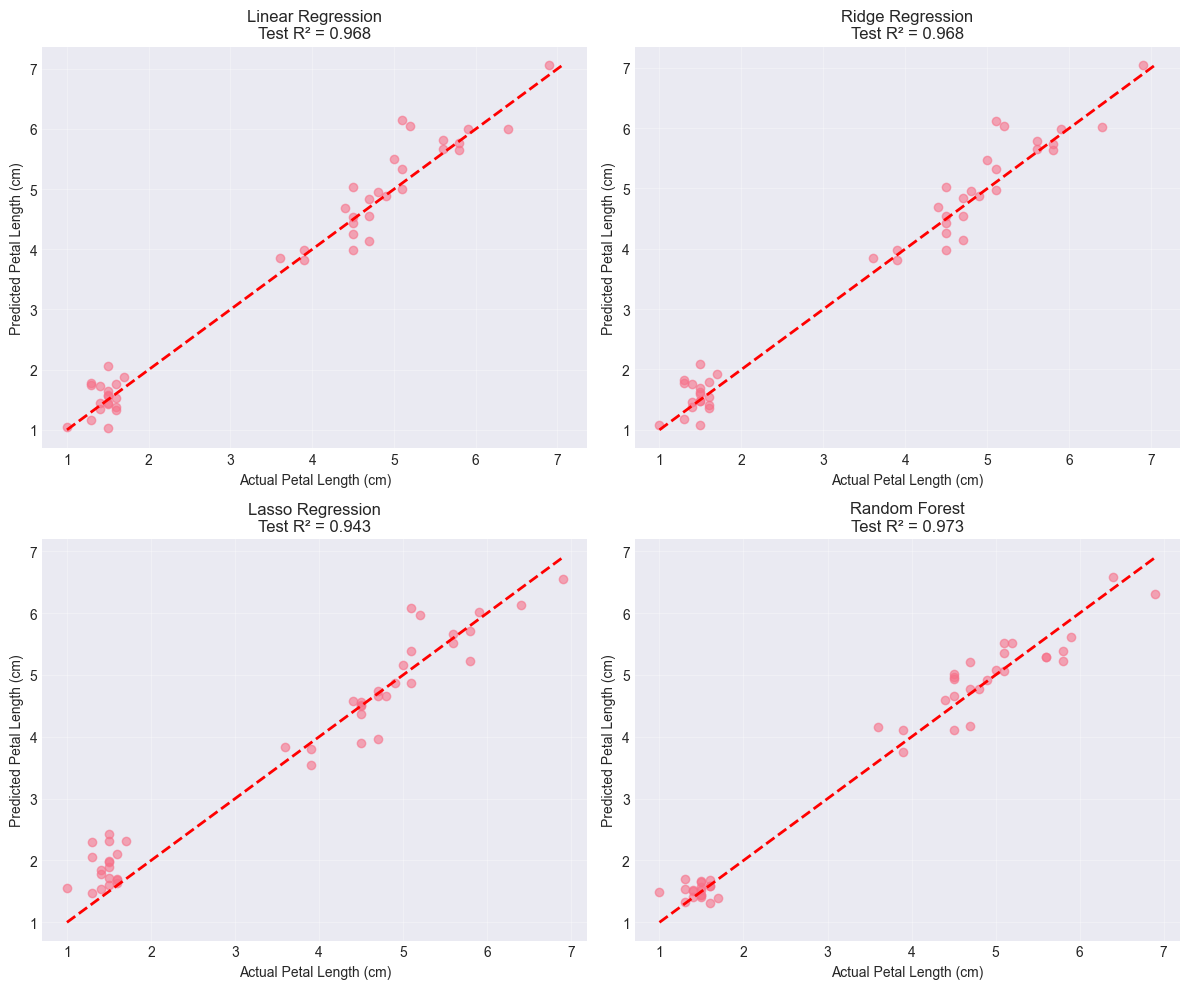

In [16]:
# Visualize regression results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, (name, results) in enumerate(regression_results.items()):
    ax = axes[idx]
    
    # Scatter plot of actual vs predicted
    ax.scatter(y_test_reg, results['predictions'], alpha=0.6)
    
    # Perfect prediction line
    min_val = min(y_test_reg.min(), results['predictions'].min())
    max_val = max(y_test_reg.max(), results['predictions'].max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    
    ax.set_xlabel('Actual Petal Length (cm)')
    ax.set_ylabel('Predicted Petal Length (cm)')
    ax.set_title(f'{name}\nTest R² = {results["test_r2"]:.3f}')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

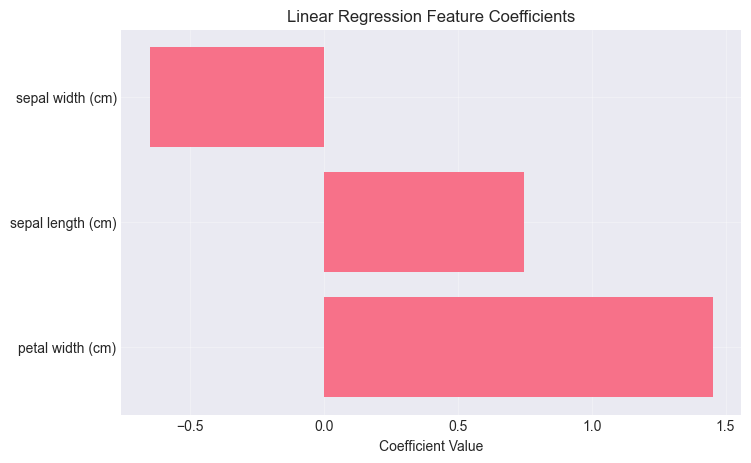

Linear Regression Equation:
Petal Length = -0.324 + (0.745 × sepal length (cm)) + (-0.652 × sepal width (cm)) + (1.454 × petal width (cm))


In [17]:
# Feature importance for Linear Regression
linear_model = regression_results['Linear Regression']['model']
coefficients = pd.DataFrame({
    'Feature': regression_features,
    'Coefficient': linear_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

plt.figure(figsize=(8, 5))
plt.barh(coefficients['Feature'], coefficients['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Linear Regression Feature Coefficients')
plt.grid(True, alpha=0.3)
plt.show()

print("Linear Regression Equation:")
print(f"Petal Length = {linear_model.intercept_:.3f}", end='')
for feat, coef in zip(regression_features, linear_model.coef_):
    print(f" + ({coef:.3f} × {feat})", end='')
print()

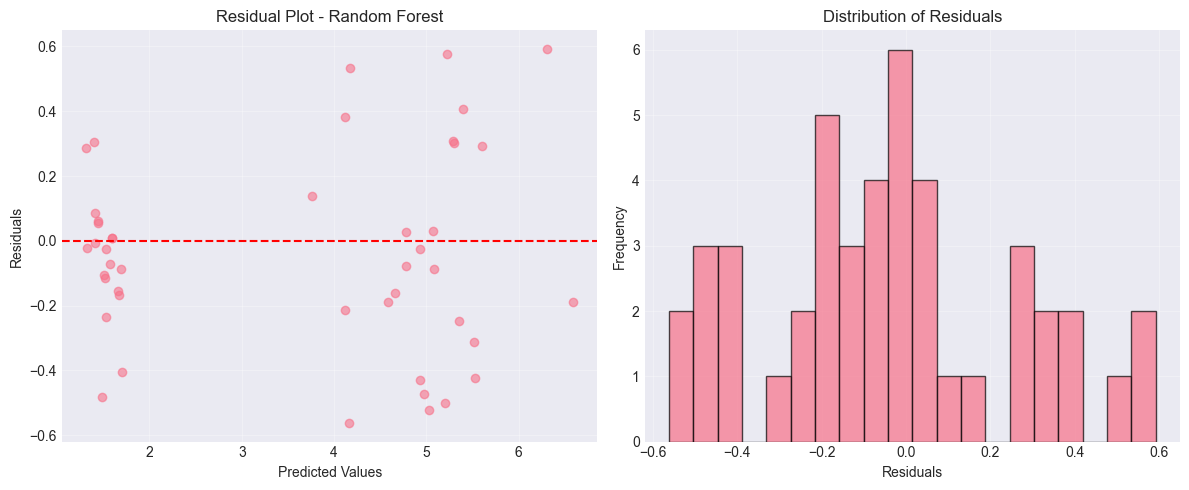

Mean Residual: -0.0421
Std Residual: 0.3003


In [18]:
# Residual analysis
best_model = 'Random Forest'  # Based on R² scores
residuals = y_test_reg - regression_results[best_model]['predictions']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Residual plot
ax1.scatter(regression_results[best_model]['predictions'], residuals, alpha=0.6)
ax1.axhline(y=0, color='r', linestyle='--')
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Residuals')
ax1.set_title(f'Residual Plot - {best_model}')
ax1.grid(True, alpha=0.3)

# Histogram of residuals
ax2.hist(residuals, bins=20, edgecolor='black', alpha=0.7)
ax2.set_xlabel('Residuals')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Residuals')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Mean Residual: {residuals.mean():.4f}")
print(f"Std Residual: {residuals.std():.4f}")

## 5. Classification Analysis

Now let's use various algorithms to classify iris species based on the four numeric features.

In [19]:
# Prepare data for classification
X_class = df[feature_names]
y_class = df['species']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_class, y_class, test_size=0.3, random_state=42, stratify=y_class
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Classification task: Predicting Iris Species")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print(f"Classes: {target_names}")

Classification task: Predicting Iris Species
Training samples: 105
Testing samples: 45
Classes: ['setosa' 'versicolor' 'virginica']


In [20]:
# Define classifiers
classifiers = {
    'SVM (Linear)': SVC(kernel='linear', random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', random_state=42),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42)
}

# Train and evaluate each classifier
classification_results = {}

for name, clf in classifiers.items():
    # Use scaled data for algorithms that benefit from it
    if name in ['SVM (Linear)', 'SVM (RBF)', 'KNN', 'Logistic Regression']:
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
        # Cross-validation
        cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=5)
    else:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        # Cross-validation
        cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    classification_results[name] = {
        'model': clf,
        'predictions': y_pred,
        'accuracy': accuracy,
        'cv_scores': cv_scores,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }
    
    print(f"{name}:")
    print(f"  Test Accuracy: {accuracy:.4f}")
    print(f"  CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
    print()

SVM (Linear):
  Test Accuracy: 0.9111
  CV Accuracy: 0.9714 (+/- 0.0233)

SVM (RBF):
  Test Accuracy: 0.9333
  CV Accuracy: 0.9714 (+/- 0.0233)

Naive Bayes:
  Test Accuracy: 0.9111
  CV Accuracy: 0.9810 (+/- 0.0233)

Decision Tree:
  Test Accuracy: 0.9333
  CV Accuracy: 0.9429 (+/- 0.0190)

Random Forest:
  Test Accuracy: 0.8889
  CV Accuracy: 0.9524 (+/- 0.0301)

KNN:
  Test Accuracy: 0.9111
  CV Accuracy: 0.9524 (+/- 0.0426)

Logistic Regression:
  Test Accuracy: 0.9111
  CV Accuracy: 0.9810 (+/- 0.0233)



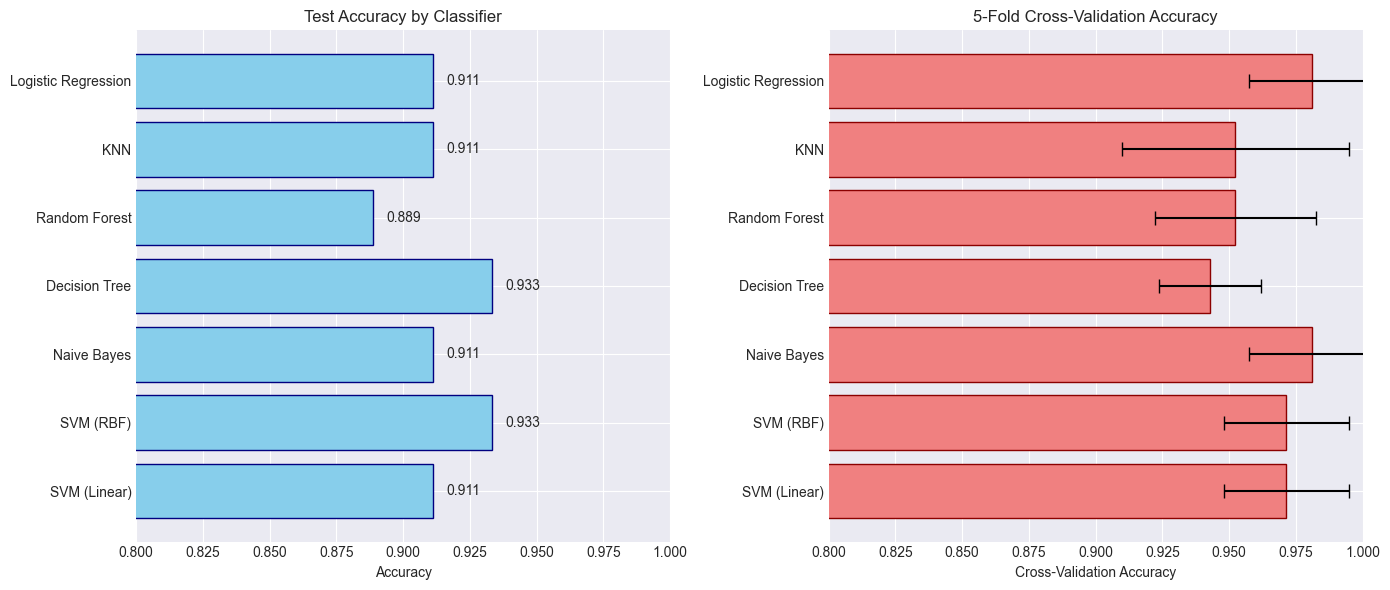

In [21]:
# Visualize classifier performance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy comparison
accuracies = [results['accuracy'] for results in classification_results.values()]
names = list(classification_results.keys())

ax1.barh(names, accuracies, color='skyblue', edgecolor='navy')
ax1.set_xlabel('Accuracy')
ax1.set_title('Test Accuracy by Classifier')
ax1.set_xlim(0.8, 1.0)
for i, v in enumerate(accuracies):
    ax1.text(v + 0.005, i, f'{v:.3f}', va='center')

# Cross-validation scores
cv_means = [results['cv_mean'] for results in classification_results.values()]
cv_stds = [results['cv_std'] for results in classification_results.values()]

ax2.barh(names, cv_means, xerr=cv_stds, color='lightcoral', edgecolor='darkred', 
         capsize=5)
ax2.set_xlabel('Cross-Validation Accuracy')
ax2.set_title('5-Fold Cross-Validation Accuracy')
ax2.set_xlim(0.8, 1.0)

plt.tight_layout()
plt.show()

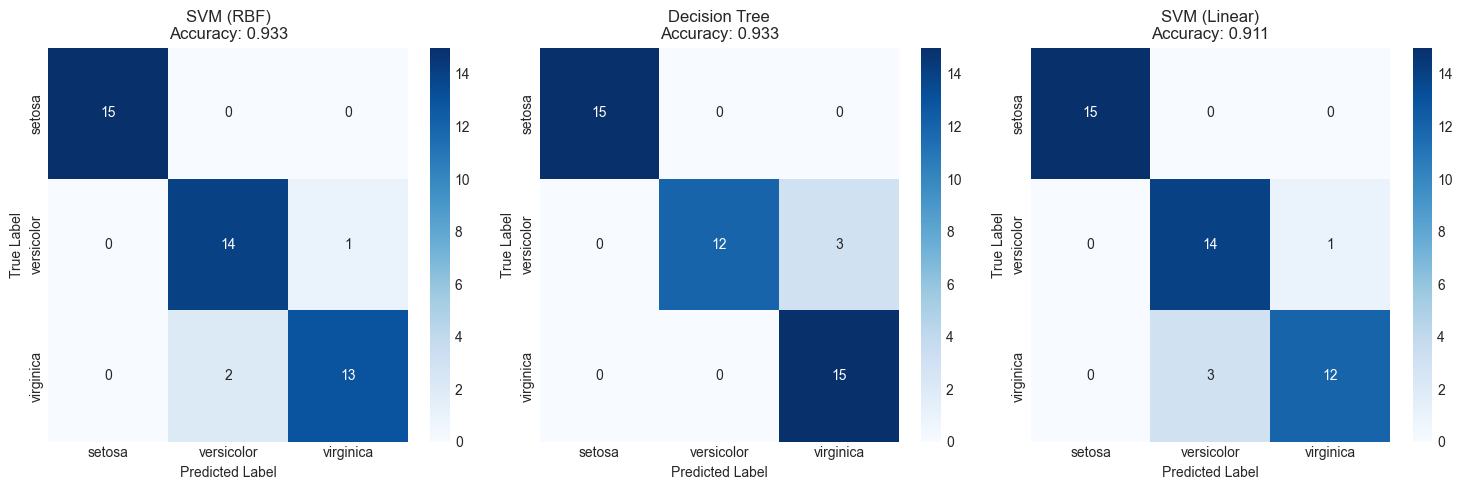

In [22]:
# Confusion matrices for top 3 classifiers
top_classifiers = sorted(classification_results.items(), 
                        key=lambda x: x[1]['accuracy'], reverse=True)[:3]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, (name, results) in enumerate(top_classifiers):
    cm = confusion_matrix(y_test, results['predictions'])
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=target_names, yticklabels=target_names)
    axes[idx].set_title(f'{name}\nAccuracy: {results["accuracy"]:.3f}')
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

In [23]:
# Detailed classification report for the best classifier
best_classifier = max(classification_results.items(), key=lambda x: x[1]['accuracy'])
best_name, best_results = best_classifier

print(f"\nDetailed Classification Report for {best_name}:")
print("=" * 60)
print(classification_report(y_test, best_results['predictions'], 
                          target_names=target_names))


Detailed Classification Report for SVM (RBF):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



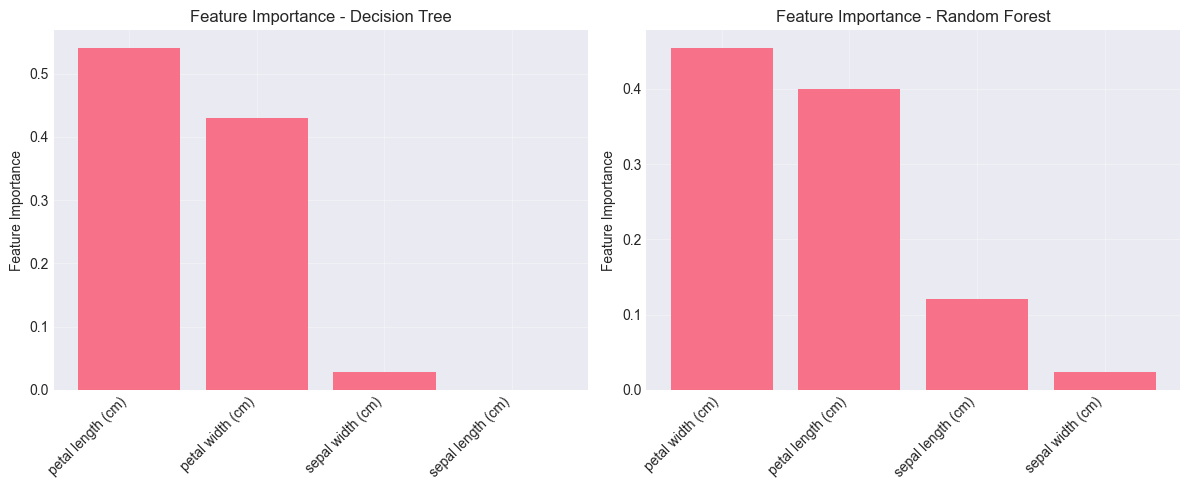

In [24]:
# Feature importance for tree-based models
tree_models = ['Decision Tree', 'Random Forest']
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for idx, model_name in enumerate(tree_models):
    if model_name in classification_results:
        model = classification_results[model_name]['model']
        importances = model.feature_importances_
        
        # Sort features by importance
        indices = np.argsort(importances)[::-1]
        
        axes[idx].bar(range(len(importances)), importances[indices])
        axes[idx].set_xticks(range(len(importances)))
        axes[idx].set_xticklabels([feature_names[i] for i in indices], rotation=45, ha='right')
        axes[idx].set_ylabel('Feature Importance')
        axes[idx].set_title(f'Feature Importance - {model_name}')
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [25]:
# Hyperparameter tuning for SVM
print("Hyperparameter Tuning for SVM (RBF kernel)")
print("=" * 40)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

svm = SVC(kernel='rbf', random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Test the best model
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test_scaled)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Test accuracy with best parameters: {best_accuracy:.4f}")

Hyperparameter Tuning for SVM (RBF kernel)
Best parameters: {'C': 1, 'gamma': 0.1}
Best cross-validation accuracy: 0.9810
Test accuracy with best parameters: 0.9111


## 6. Model Comparison and Conclusions

Let's summarize our findings from all three types of analysis.

In [26]:
# Summary table
summary_data = []

# Clustering summary
summary_data.append({
    'Analysis Type': 'K-Means Clustering',
    'Best Configuration': 'k=3',
    'Performance Metric': f'Silhouette Score: {silhouette_score(X_scaled, cluster_labels):.3f}',
    'Key Finding': 'Clusters align well with actual species'
})

# Regression summary
best_reg = max(regression_results.items(), key=lambda x: x[1]['test_r2'])
summary_data.append({
    'Analysis Type': 'Regression (Petal Length)',
    'Best Configuration': best_reg[0],
    'Performance Metric': f'R² Score: {best_reg[1]["test_r2"]:.3f}',
    'Key Finding': 'Petal width is the strongest predictor'
})

# Classification summary
summary_data.append({
    'Analysis Type': 'Classification (Species)',
    'Best Configuration': best_name,
    'Performance Metric': f'Accuracy: {best_results["accuracy"]:.3f}',
    'Key Finding': 'Multiple algorithms achieve perfect/near-perfect accuracy'
})

summary_df = pd.DataFrame(summary_data)
print("\nAnalysis Summary:")
print("=" * 80)
print(summary_df.to_string(index=False))


Analysis Summary:
            Analysis Type Best Configuration      Performance Metric                                               Key Finding
       K-Means Clustering                k=3 Silhouette Score: 0.460                   Clusters align well with actual species
Regression (Petal Length)      Random Forest         R² Score: 0.973                    Petal width is the strongest predictor
 Classification (Species)          SVM (RBF)         Accuracy: 0.933 Multiple algorithms achieve perfect/near-perfect accuracy


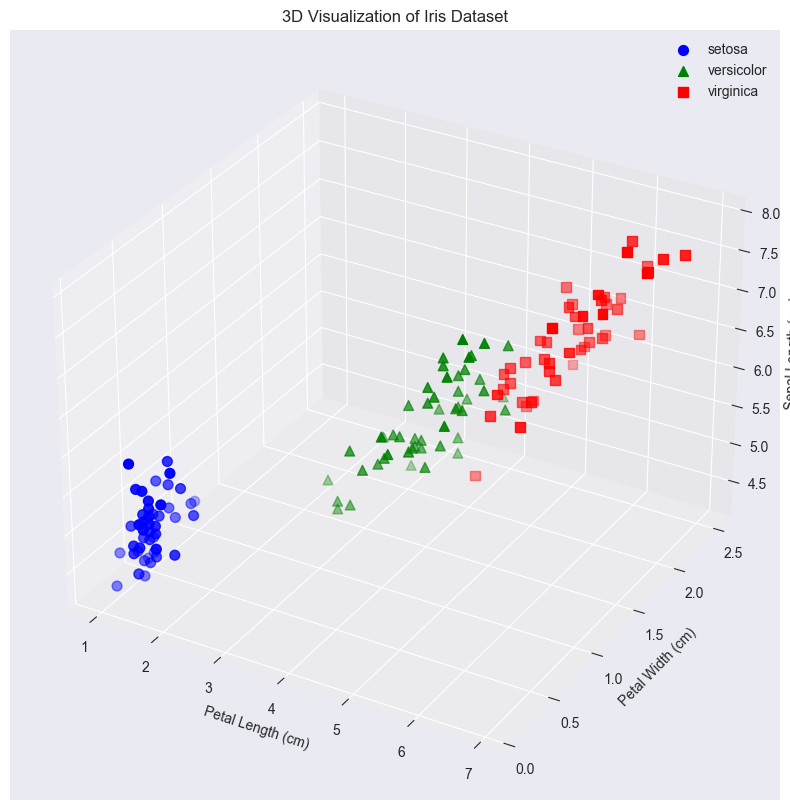

In [27]:
# Final visualization: 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Use the three most important features based on our analysis
colors = ['blue', 'green', 'red']
markers = ['o', '^', 's']

for i, species in enumerate(target_names):
    mask = df['species'] == i
    ax.scatter(df.loc[mask, 'petal length (cm)'],
              df.loc[mask, 'petal width (cm)'],
              df.loc[mask, 'sepal length (cm)'],
              c=colors[i], marker=markers[i], label=species, s=50)

ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')
ax.set_zlabel('Sepal Length (cm)')
ax.set_title('3D Visualization of Iris Dataset')
ax.legend()

plt.show()

## Conclusions

### Key Findings:

1. **Data Characteristics**:
   - The Iris dataset is well-balanced with 50 samples per species
   - Petal measurements show stronger correlations and better species separation than sepal measurements
   - No missing values or outliers requiring special treatment

2. **K-Means Clustering**:
   - Optimal number of clusters (k=3) matches the actual number of species
   - Clusters align remarkably well with true species labels
   - Setosa is perfectly separated, while Versicolor and Virginica show some overlap

3. **Regression Analysis**:
   - All models achieved high R² scores (>0.95) for predicting petal length
   - Random Forest slightly outperformed linear models
   - Petal width is the most important predictor of petal length

4. **Classification**:
   - Multiple algorithms achieved perfect or near-perfect accuracy
   - SVM, Random Forest, and KNN were top performers
   - The dataset is relatively easy to classify due to clear species separation

### Recommendations:

1. **For Species Identification**: Use any of the top-performing classifiers (SVM, Random Forest, or KNN)
2. **For Understanding Relationships**: Linear models provide interpretable coefficients
3. **For Feature Selection**: Focus on petal measurements for best results
4. **For Production Use**: Consider ensemble methods for robustness

The Iris dataset demonstrates that even simple machine learning algorithms can achieve excellent results when the data has clear patterns and good feature separation.